In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [7]:
df = pd.read_csv("homicide_by_countries.csv")

In [8]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [9]:
df.shape

(195, 6)

In [10]:
df.isna().any()

Location     False
Region       False
Subregion    False
Rate         False
Count        False
Year         False
dtype: bool

In [11]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [12]:
my_list = ["Rate","Count","Year"]
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [27]:
df


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [14]:
df1 = df.sort_values("Count",ascending=False)

df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [15]:
df1 = df[["Location","Count"]].sort_values(by="Count",ascending = False).head(5)
df1["Perc"] = (df1["Count"]*100/df1["Count"].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


<Figure size 800x800 with 0 Axes>

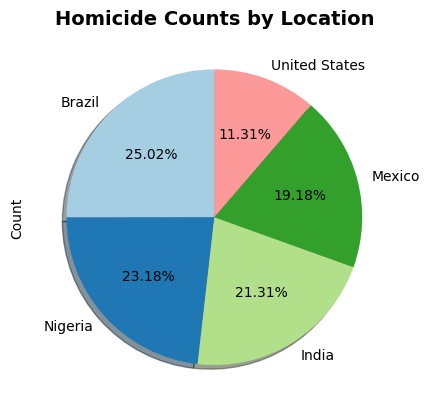

In [19]:
# df1.plot(x="Location",y="Count",kind="pie",labels= df1.Location,autopct="%1.2f%%")
# plt.legend().set_visible(False)
plt.figure(figsize=(8, 8))  
colors = plt.cm.Paired(range(len(df1))) 

df1.plot(
    x="Location",
    y="Count",
    kind="pie",
    labels=df1["Location"],  
    autopct="%1.2f%%",       
    colors=colors,           
    fontsize=10,             
    startangle=90,          
    shadow=True,             
)
plt.title("Homicide Counts by Location", fontsize=14, fontweight='bold')
plt.gca().set_aspect('equal')
plt.legend().set_visible(False)


In [33]:
df['Region'].replace('Americas','N/S America')
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [39]:
df2 = df.groupby("Region")["Count"].sum().sort_values(ascending=False)
df2 = df2.to_frame()

<Figure size 600x600 with 0 Axes>

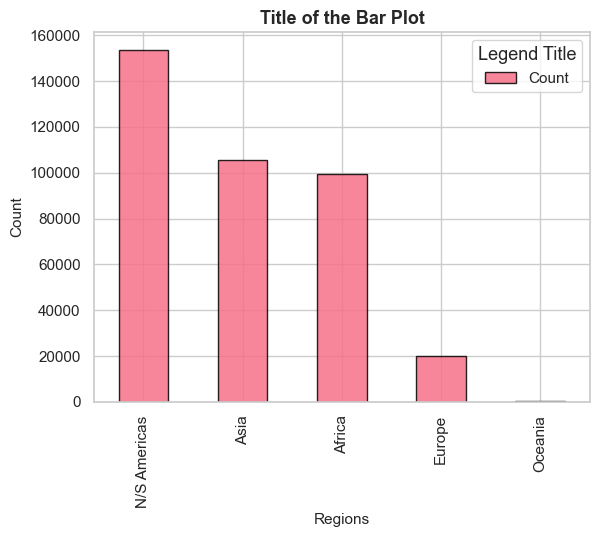

In [43]:
plt.figure(figsize=(6, 6)) 
ax = df2.plot(kind="bar", 
              color=sns.color_palette("husl", len(df2.columns)), 
              edgecolor='black', 
              alpha=0.85) 
ax.set_title("Title of the Bar Plot", fontsize=13, fontweight='bold') 
ax.set_xlabel("Regions", fontsize=11)  
ax.set_ylabel("Count", fontsize=11)  
ax.legend(title="Legend Title", title_fontsize='13', fontsize='11')
plt.show()


In [56]:
df3 = df.groupby("Subregion")["Count"].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

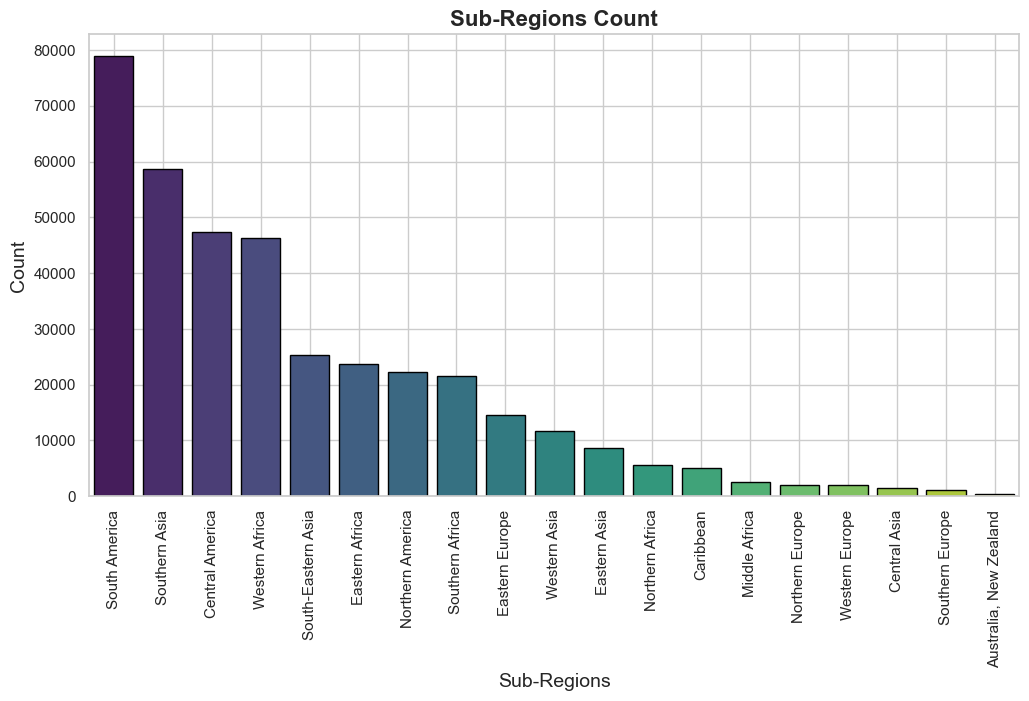

In [65]:
# sns.barplot(x=df3.index,y=df3.values)
# plt.xticks(rotation=90)
# xlabel = None
plt.figure(figsize=(12, 6)) 
sns.set(style="whitegrid") 
palette = sns.color_palette("viridis", len(df3))  
ax = sns.barplot(x=df3.index, y=df3.values, palette=palette, hue=df3.index, dodge=False, edgecolor='black', legend=False)
plt.xticks(rotation=90)
ax.set_xlabel("Sub-Regions",fontsize=14)  
ax.set_title("Sub-Regions Count", fontsize=16, fontweight='bold')  
ax.set_ylabel("Count", fontsize=14) 
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [70]:
df.Year.value_counts()


Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [78]:
df4 = df[df["Region"].isin(["Asia","Europe"])]


In [82]:
df4 = df4[df4["Year"]>2016][["Region","Year","Count"]]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [84]:
df4 = df4.groupby(["Region","Year"]).sum()["Count"]
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [103]:
df_unstacked = df4.unstack(level=0).fillna(0)
df_unstacked.index = df_unstacked.index.astype(str)

<Figure size 1000x600 with 0 Axes>

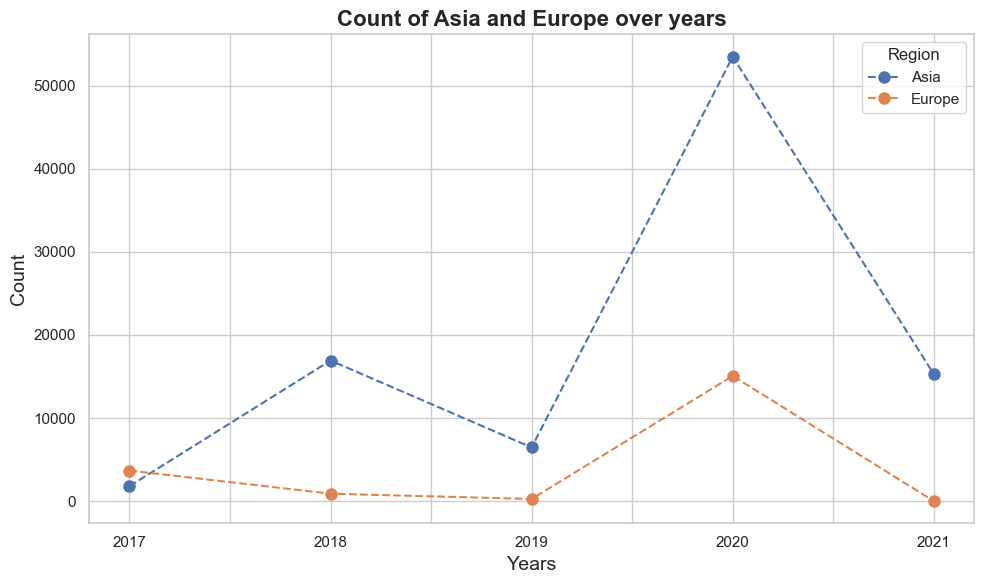

In [129]:
# df_unstacked.plot(kind="line",figsize=(10,6))
plt.figure(figsize=(10, 6)) 
sns.set(style="whitegrid")
ax = df_unstacked.plot(kind="line", marker='o', linestyle='--', markersize=8, figsize=(10, 6))
ax.set_title("Count of Asia and Europe over years", fontsize=16, fontweight='bold') 
ax.set_xlabel("Years", fontsize=14)  
ax.set_ylabel("Count", fontsize=14)
ax.grid(True)
plt.tight_layout()
plt.show()

In [121]:
df5 = df.groupby(["Year"])["Rate"].sum().sort_values(ascending=False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

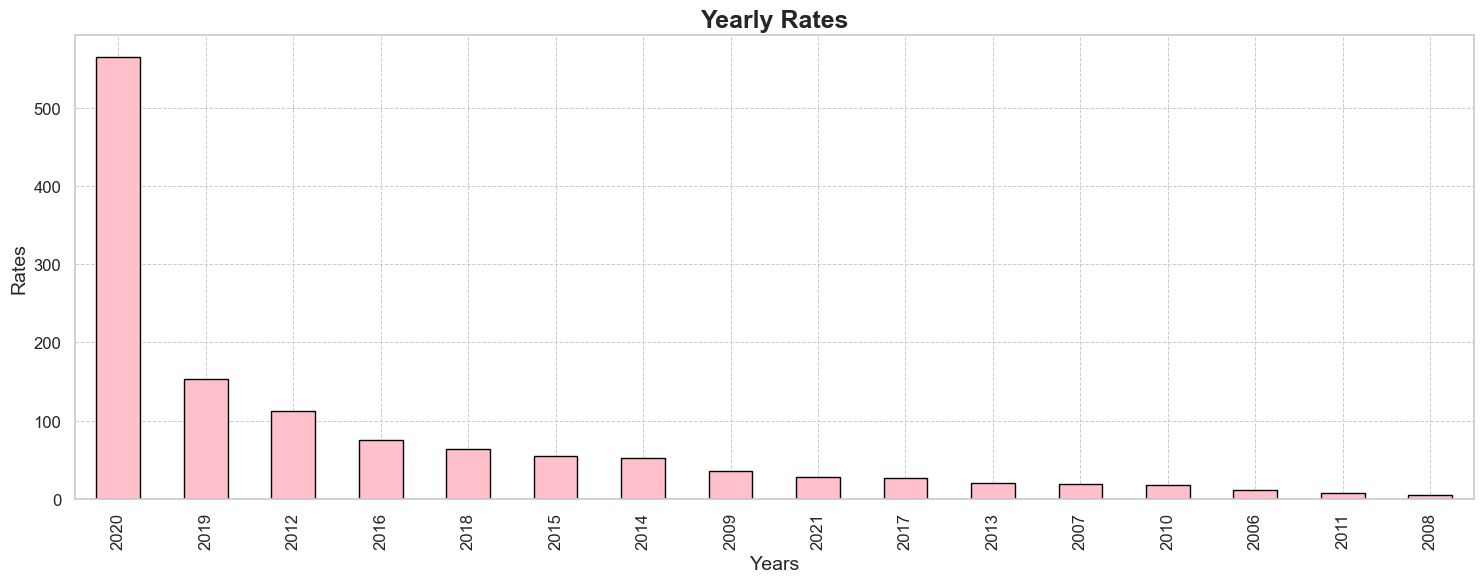

In [135]:
# df5.plot(kind="line")
plt.figure(figsize=(7,3)) 
sns.set(style="whitegrid")
ax = df5.plot(kind="bar",figsize=(15, 6),color='pink',edgecolor='black')
ax.set_title("Yearly Rates", fontsize=18, fontweight='bold')  
ax.set_xlabel("Years", fontsize=14)  
ax.set_ylabel("Rates", fontsize=14)  
ax.tick_params(axis='x', labelsize=12)  
ax.tick_params(axis='y', labelsize=12) 
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

